# CoreNLP Parsing with NLTK Wrapper

<br>
This utilizes the NLTK Wrapper for CoreNLP in order to parse sentences from BBN/ACCENT to identify additionally verbs to add to PETRARCH Dictionaries to increase precision and Recall
<br>
<br>
Setup Environment

In [1]:
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

### Server Terminal > cd $CORENLP_HOME
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 30000
<br>
<br>
Connect parser to server running CoreNLP

In [2]:
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

# NYTBatch50 Accent
#### Read in NYTbatch50 BBN/ACCENT DATA, trim to CAMEO 145, and create a subset of events to test

In [48]:
extract = pd.read_csv('nytextract.csv')
protest_violent = extract[extract.code == 145].reset_index()
small = protest_violent.head()
small

,index,aid,code,text,bad
0,240,22338793,145,\n Yesterday the news agency reported that...,0
1,241,22339503,145,"""Thirty-four men arrested late last night were...",0
2,242,22395783,145,"""In the worst outbreak of street violence in 1...",0
3,243,22398252,145,Paris policemen and leftist extremists clash a...,0
4,244,22407123,145,"Violence occurred through most of the day, des...",0


#### Create regular sentence parser: input data and column

In [3]:
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

#### Run core_parser with small batch data

In [49]:
%time protest_violent['parsed'] = core_parser(protest_violent, 'text')

CPU times: user 110 ms, sys: 9.06 ms, total: 119 ms
Wall time: 31.3 s


#### To view each parse-tree, index new column starting at 0

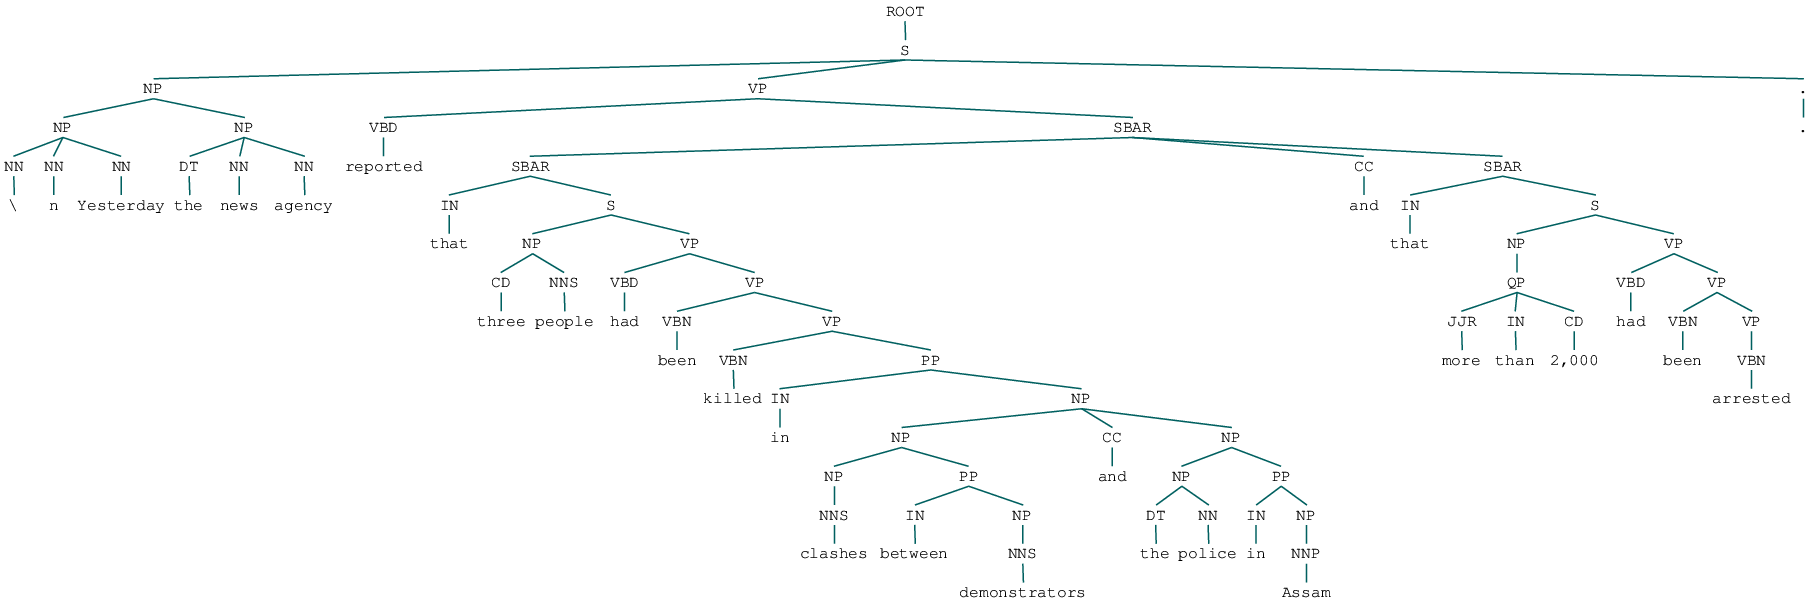

In [51]:
protest_violent['parsed'].iloc[0]

#### Create dependency sentence parser: input data and column

In [4]:
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

#### Run dep_parser with small batch test data

In [52]:
%time protest_violent["dep"] = dep_parser(protest_violent, 'text')

CPU times: user 116 ms, sys: 12.2 ms, total: 129 ms
Wall time: 2.07 s


#### To view each dependency parse-tree, index new column starting at 0

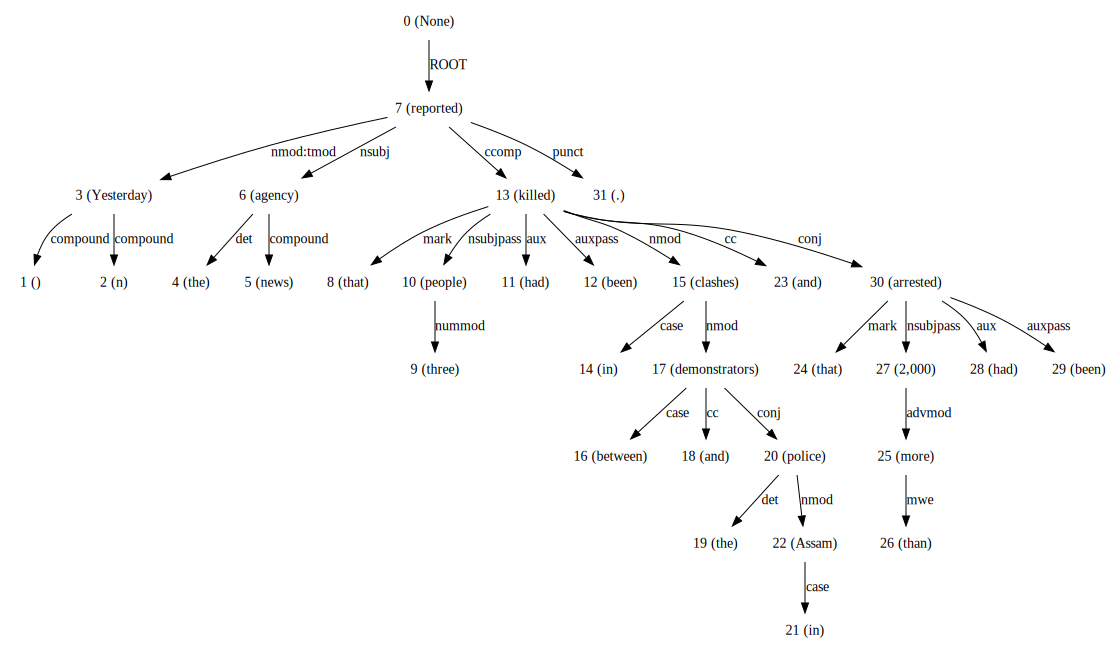

In [53]:
protest_violent["dep"].iloc[0]

#### To view both trees simultaneously, use function 'easy_read' with three arguments (dataframe, index number) (this is provided you use the same naming scheme I used, but easy to change)

In [103]:
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))

In [ ]:
easy_read(nyt, nyt_dep, protest_violent, 24, 'text')

In [ ]:
protest_violent

# NYTbd Sample 14-18
Read in data

In [193]:
sample1418 = pd.read_csv("Data/ACCENT NYTbd sample 14 18.csv")

In [194]:
# Trim to Root Code 18
assault = sample1418[sample1418["root_code"] == 18]
assault

,document_id,aid,sentence_id,date_str,date,year,month,day,event_tense,root_code,...,source_country_codes,source_agent_id,source_agent_name,target_actor_id,target_actor_name,target_country_codes,target_agent_id,target_agent_name,text,batch
0,NYTborndigital_19920704_23204013,23204013,0,19920704,07/04/1992,1992,7,4,neutral,18,...,US,27.0,Law Enforcement,41262.0,United States,US,714.0,Children,"""Jose Dolores Martinez, 41, shot his wife and ...",57
6,NYTborndigital_20040130_23968047,23968047,1,20040130,01/30/2004,2004,1,30,historical,18,...,PS,600.0,Armed Gang,31843.0,Israel,IL,173.0,Citizen,"Anwar Yassin, one of the released Lebanese pri...",44
7,NYTborndigital_20050111_24026263,24026263,18,20050111,01/11/2005,2005,1,11,neutral,18,...,PS,NaN,NaN,31843.0,Israel,IL,NaN,NaN,"The militant group Hamas, which has carried ou...",59
8,NYTborndigital_20020708_23851804,23851804,66,20020708,07/08/2002,2002,7,8,current,18,...,IL,600.0,Armed Gang,31843.0,Israel,IL,173.0,Citizen,\nHe walked down the hall to see a patient who...,69
9,NYTborndigital_19880208_22900810,22900810,2,19880208,02/08/1988,1988,2,8,current,18,...,IN,173.0,Citizen,41262.0,United States,US,173.0,Citizen,\n\n\n\nWhen the Rural Justice Center looked f...,36
11,NYTborndigital_19851007_22709434,22709434,0,19851007,10/07/1985,1985,10,7,neutral,18,...,US,690.0,Attacker,41262.0,United States,US,27.0,Law Enforcement,"""A man shot four bystanders when he pulled a g...",5
12,NYTborndigital_20020420_23862466,23862466,6,20020420,04/20/2002,2002,4,20,neutral,18,...,PS,600.0,Armed Gang,34539.0,"Palestinian Territory, Occupied",PS,NaN,NaN,It wounded two Israeli soldiers as the bomber ...,34
15,NYTborndigital_20020419_23887704,23887704,21,20020419,04/19/2002,2002,4,19,neutral,18,...,IL,690.0,Attacker,31843.0,Israel,IL,173.0,Citizen,The couple were among 28 people killed by a su...,79
18,NYTborndigital_20020403_23889779,23889779,6,20020403,04/03/2002,2002,4,3,neutral,18,...,PS,173.0,Citizen,34539.0,"Palestinian Territory, Occupied",PS,NaN,NaN,Dozens of Palestinian gunmen were reported to ...,34
19,NYTborndigital_20051026_24068728,24068728,124,20051026,10/26/2005,2005,10,26,historical,18,...,IQ,173.0,Citizen,43427.0,United Nations,NaN,NaN,NaN,U.S. forces begin an assault on Baghdad.\nMay...,84


In [19]:
%time assault['parsed'] = core_parser(assault, 'text')

CPU times: user 366 ms, sys: 197 ms, total: 563 ms
Wall time: 2min 11s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
%time assault['dep'] = dep_parser(assault, 'text')

CPU times: user 427 ms, sys: 30.7 ms, total: 458 ms
Wall time: 7.07 s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Read in 'Root Code 18' Data

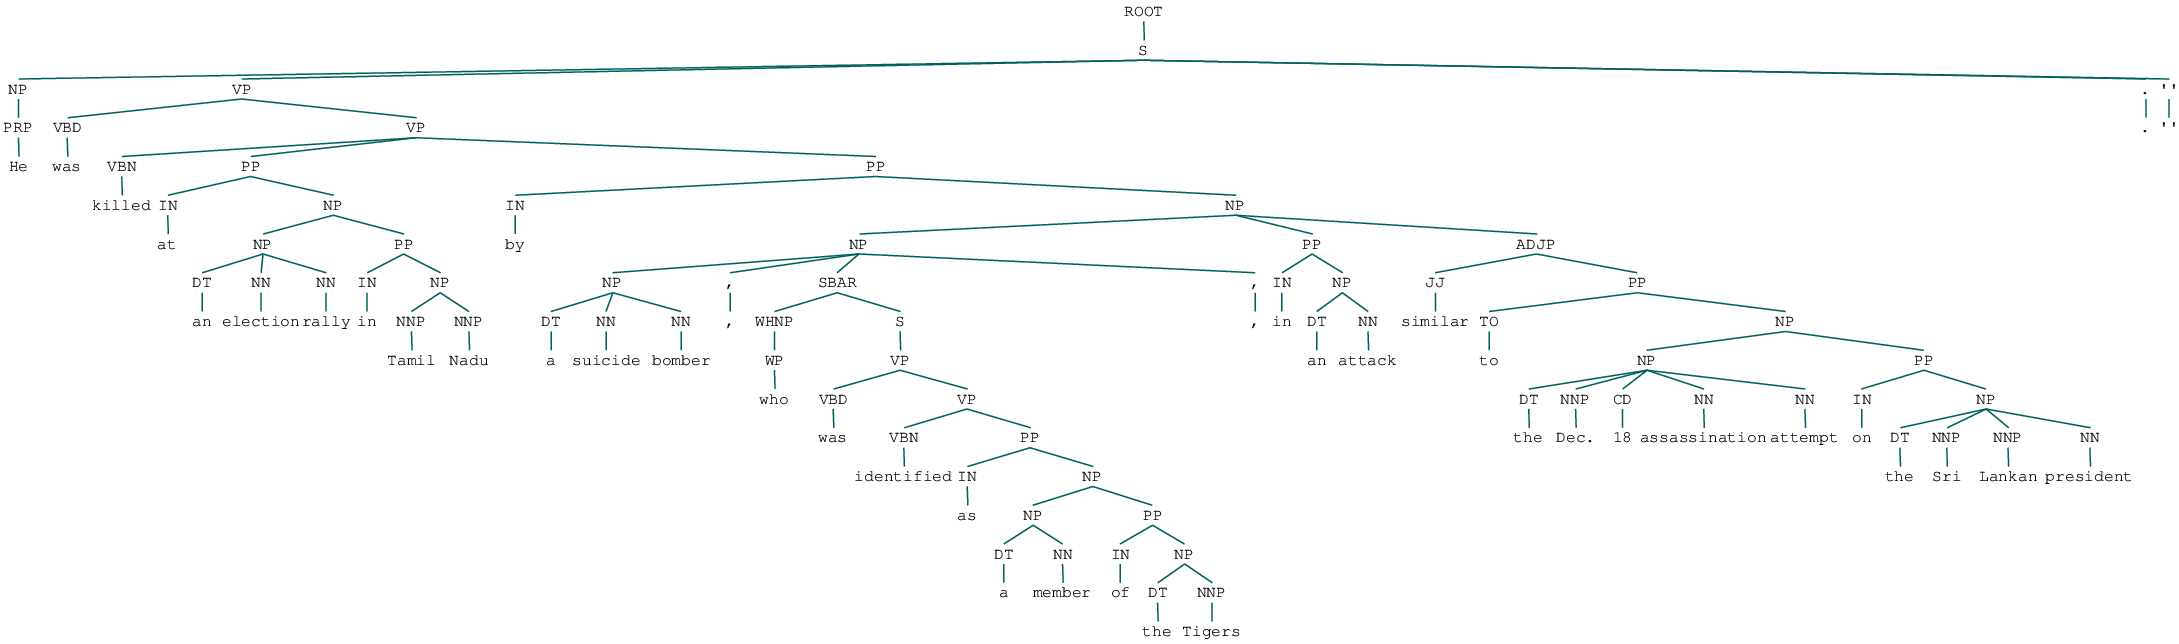

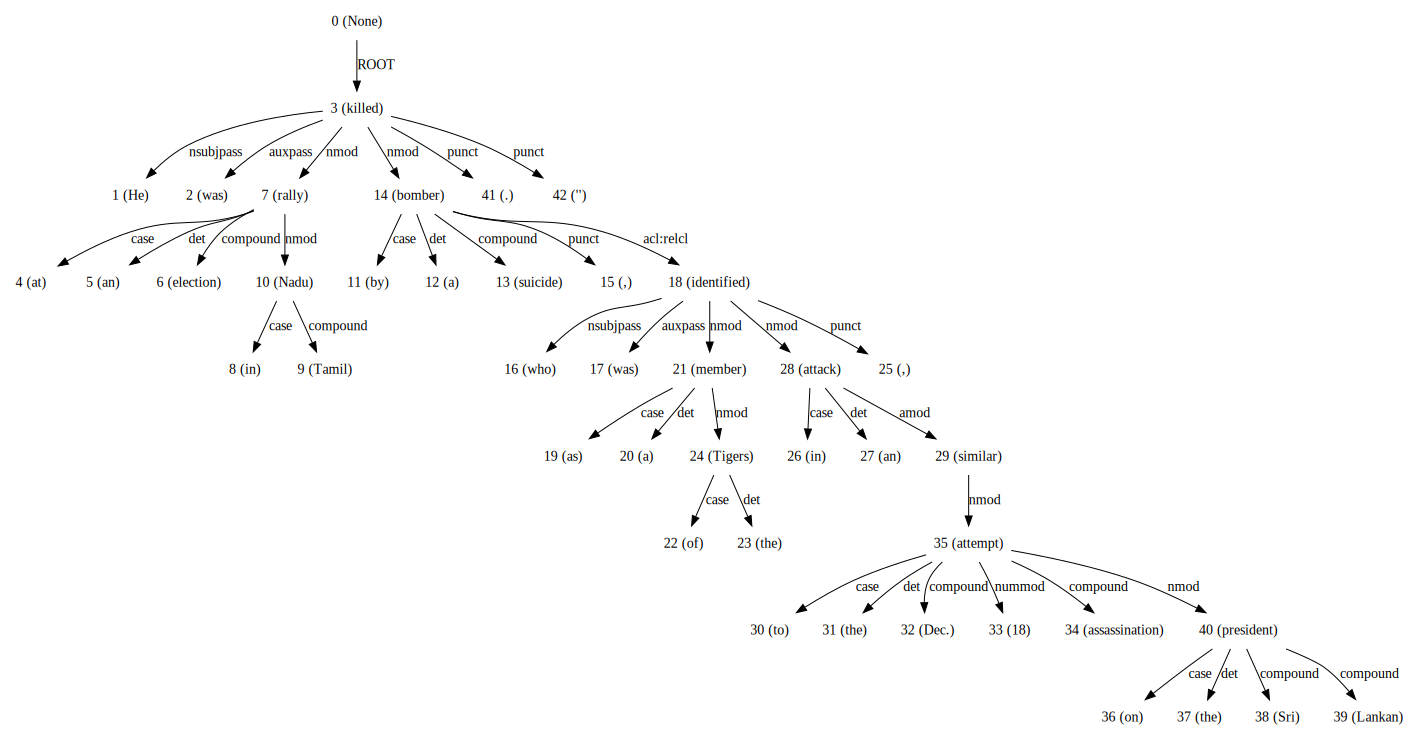

'Text =He was killed at an election rally in Tamil Nadu by a suicide bomber, who was identified as a member of the Tigers, in an attack similar to the Dec. 18 assassination attempt on the Sri Lankan president."'

'Code =1831'

In [102]:
easy_read(assault, 47)

# Look at PETRACH and ACCENT 14_18

In [210]:
petrarch1418 = pd.read_csv("Data/PETRARCH output sample 14 18.txt", sep='\t')
petrarch18 = petrarch1418[petrarch1418['root_code']==18]
accent_only_assault = assault[~assault.aid.isin(petrarch18.aid)]

In [209]:
petrarch_only_assault = petrarch18[~petrarch18.aid.isin(assault.aid)]

In [211]:
len(accent_only_assault)

76

### Parse PETRARCH ONLY

In [167]:
%time petrarch_only_assault['parsed'] = core_parser(petrarch_only_assault, 'text')
petrarch_only_assault['dep'] = dep_parser(petrarch_only_assault, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 188 ms, sys: 231 ms, total: 419 ms
Wall time: 3.18 s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


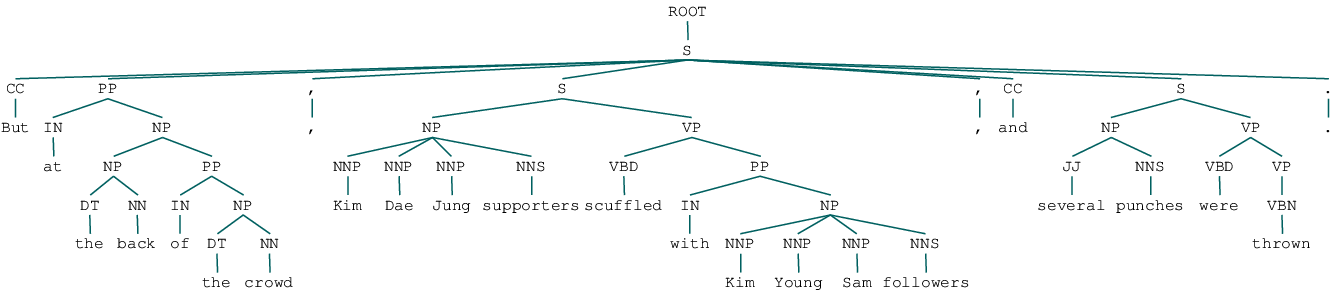

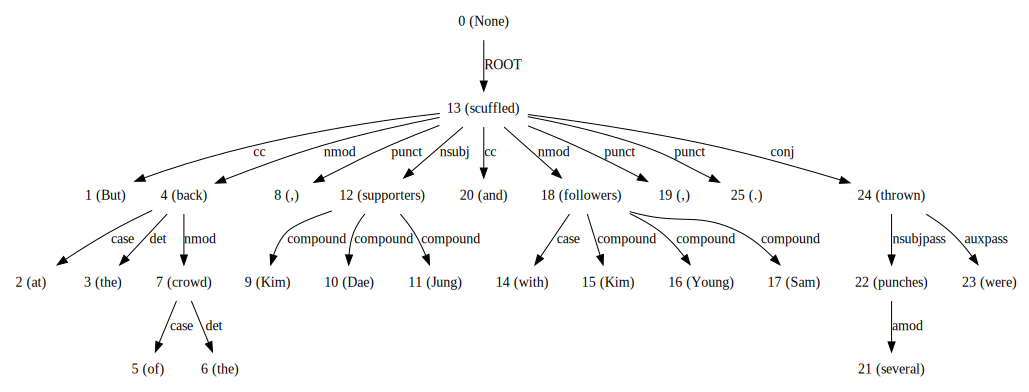

'Text = But at the back of the crowd , Kim Dae Jung supporters scuffled with Kim Young Sam followers , and several punches were thrown .'

'Code = 180'

In [169]:
easy_read(petrarch_only_assault, 7)

### Parse ACCENT Only

In [93]:
%time accent_only_assault['parsed'] = core_parser(accent_only_assault, 'text')
accent_only_assault['dep'] = dep_parser(accent_only_assault, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 378 ms, sys: 315 ms, total: 692 ms
Wall time: 1min 53s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


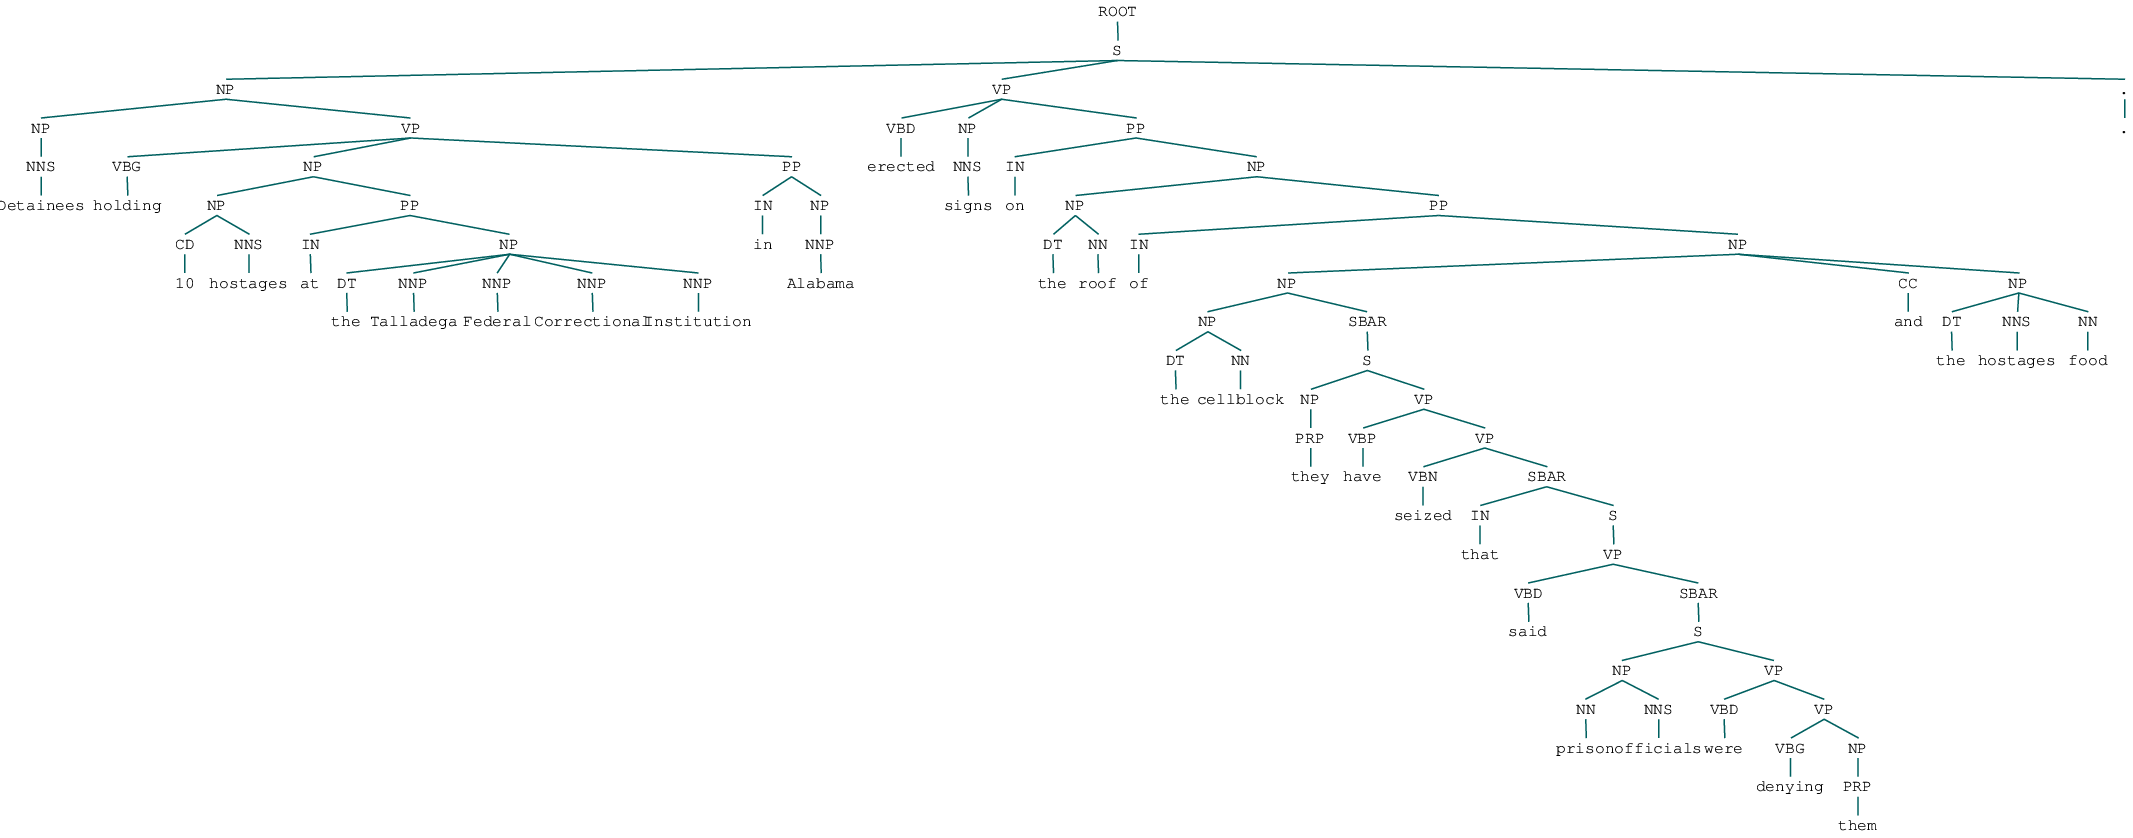

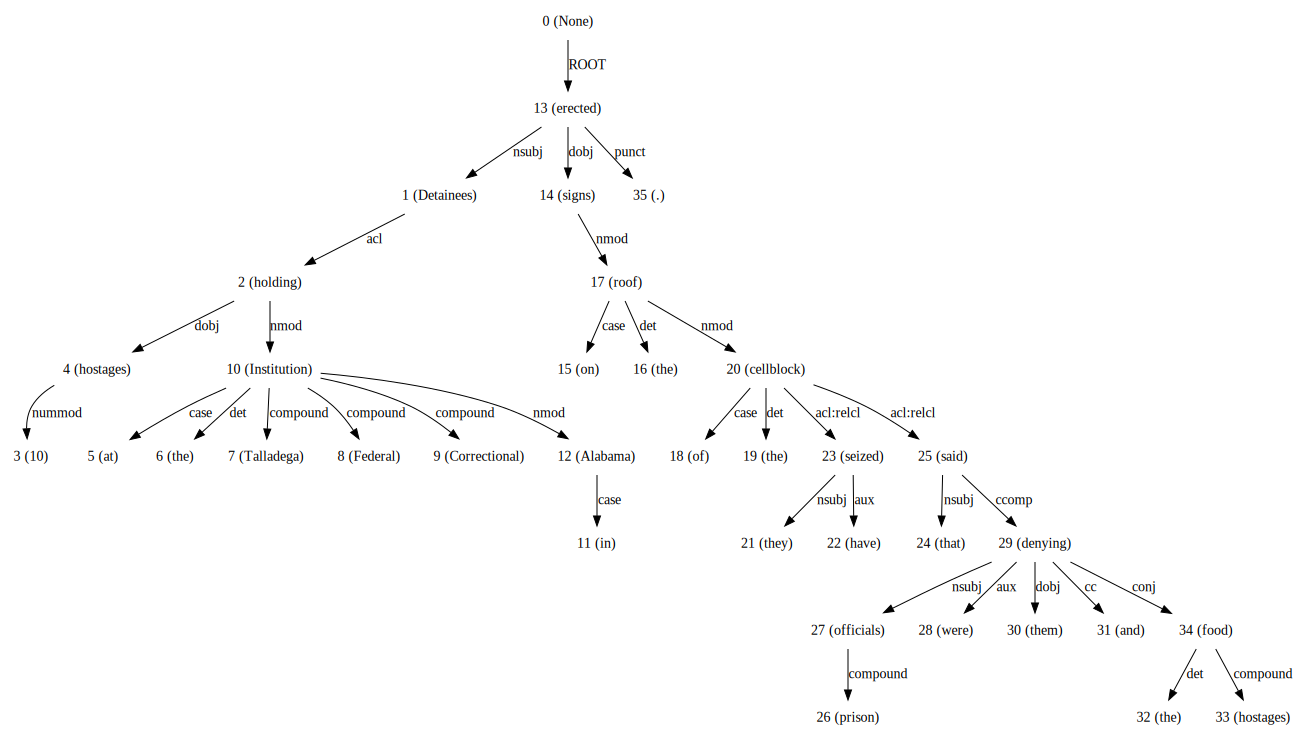

'Detainees holding 10 hostages at the Talladega Federal Correctional Institution in Alabama erected signs on the roof of the cellblock they have seized that said prison officials were denying them and the hostages food.'

In [95]:
easy_read(accent_only_assault, 75)

# Extraneous Projects
#### py-CoreNLP Wrapper

In [21]:
from pycorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('http://localhost:9000')

def depparse(text):
    parsed=""
    output = nlp.annotate(text, properties={
      'annotators': 'depparse',
      'outputFormat': 'json'
      })

    for i in output["sentences"]:
        for j in i["basicDependencies"]:
            parsed=parsed+str(j["dep"]+'('+ j["governorGloss"]+' ')+str(j["dependentGloss"]+')'+' ')
        return parsed
text="I put the book in the box on the table."

#### Stanford NLP Python Package Parser
The sentence structure of the BBN/ACCENT output makes it impossible to loop through... going to need to do some REGEX work on it to get it into a format where sentences are not broken up. Assuming 'nlp' command breaks up sentences at any '.' which is going to be a problem when trying to clean it up. 

In [ ]:
import stanfordnlp
stanfordnlp.download('en')   # This downloads the English models for the neural pipeline
nlp = stanfordnlp.Pipeline() # This sets up a default neural pipeline in English
doc = nlp("Barack Obama was born in Hawaii.  He was elected president in 2008.")
doc.sentences[0].print_dependencies()

In [ ]:
def stanlp(df, col):
    for i in range(len(df)):
        arg = nlp(df[col].iloc[i])
    return arg

In [ ]:
flop = stanlp(protest_violent, "text")

In [ ]:
flop.sentences[1].print_dependencies()